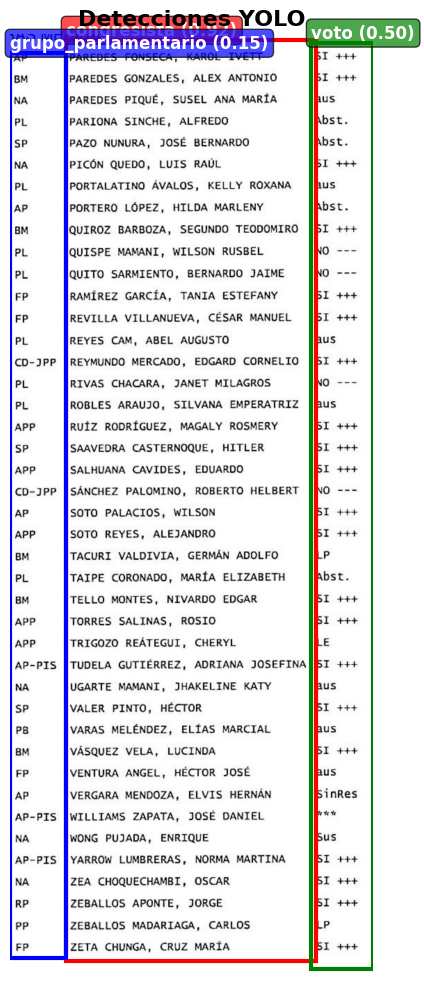


📊 Resumen de detecciones:
Total de regiones detectadas: 3
1. congresista | Confianza: 91.93% | Posición: (121, 13) → (659, 2001)
2. voto | Confianza: 50.26% | Posición: (650, 19) → (783, 2017)
3. grupo_parlamentario | Confianza: 15.45% | Posición: (0, 41) → (121, 1994)


In [1]:
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO
from matplotlib.patches import Rectangle

# 🎯 CONFIGURACIÓN
image_path = "/home/nahumfg/GithubProjects/parliament-voting-records/data/dataset_etiquetado_filas/b_etiquetados/images/fe7e1864-009.jpg"
model_path = "/home/nahumfg/GithubProjects/parliament-voting-records/validation/yolo_filas/experiments/yolo11s_img480_bs32_fold_10/weights/best.pt"

# 📦 Cargar modelo y imagen
model = YOLO(model_path)
image_bgr = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# 🔍 Detectar regiones
results = model.predict(
    source=image_bgr,
    conf=0.001,        # Mismo que en entrenamiento
    iou=0.7,          # Mismo que en entrenamiento  
    max_det=3,        # Exactamente 3 detecciones
    agnostic_nms=True, # NMS agnóstico entre clases
    verbose=False
)

# 📊 Visualizar resultados
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.imshow(image_rgb)

# Colores para cada clase
colors = ['red', 'blue', 'green', 'yellow', 'purple', 'orange']

for result in results:
    boxes = result.boxes
    labels = result.names
    
    for i, box in enumerate(boxes):
        # Coordenadas
        x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
        width = x_max - x_min
        height = y_max - y_min
        
        # Label y confianza
        cls_id = int(box.cls[0])
        label = labels[cls_id]
        conf = float(box.conf[0])
        
        # Dibujar rectángulo
        color = colors[cls_id % len(colors)]
        rect = Rectangle((x_min, y_min), width, height, 
                         linewidth=3, edgecolor=color, facecolor='none')
        ax.add_patch(rect)
        
        # Añadir texto
        ax.text(x_min, y_min - 10, f'{label} ({conf:.2f})', 
                bbox=dict(boxstyle='round', facecolor=color, alpha=0.7),
                fontsize=12, color='white', weight='bold')

ax.axis('off')
plt.tight_layout()
plt.title('Detecciones YOLO', fontsize=16, weight='bold')
plt.show()

# 📋 Resumen de detecciones
print(f"\n📊 Resumen de detecciones:")
print(f"Total de regiones detectadas: {len(boxes)}")
for i, box in enumerate(boxes, 1):
    cls_id = int(box.cls[0])
    label = labels[cls_id]
    conf = float(box.conf[0])
    x_min, y_min, x_max, y_max = map(int, box.xyxy[0])
    print(f"{i}. {label} | Confianza: {conf:.2%} | Posición: ({x_min}, {y_min}) → ({x_max}, {y_max})")

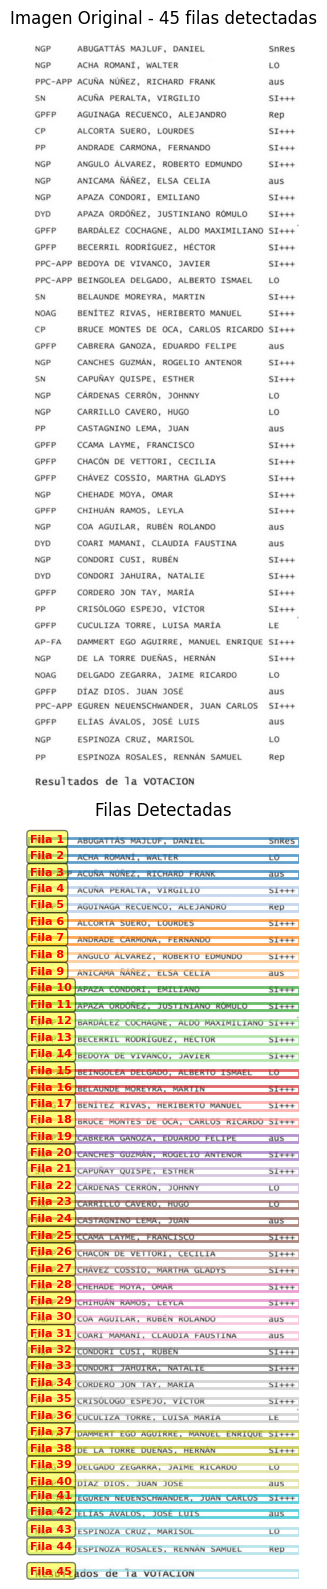


✅ Total de filas detectadas: 45

Coordenadas de cada fila:
--------------------------------------------------
Fila  1: Y= 40 a Y= 61 (altura=21px)
Fila  2: Y= 87 a Y=107 (altura=20px)
Fila  3: Y=134 a Y=154 (altura=20px)
Fila  4: Y=180 a Y=200 (altura=20px)
Fila  5: Y=226 a Y=247 (altura=21px)
Fila  6: Y=273 a Y=294 (altura=21px)
Fila  7: Y=320 a Y=340 (altura=20px)
Fila  8: Y=367 a Y=387 (altura=20px)
Fila  9: Y=414 a Y=435 (altura=21px)
Fila 10: Y=461 a Y=481 (altura=20px)
Fila 11: Y=508 a Y=528 (altura=20px)
Fila 12: Y=555 a Y=576 (altura=21px)
Fila 13: Y=602 a Y=623 (altura=21px)
Fila 14: Y=649 a Y=669 (altura=20px)
Fila 15: Y=696 a Y=716 (altura=20px)
Fila 16: Y=743 a Y=763 (altura=20px)
Fila 17: Y=789 a Y=810 (altura=21px)
Fila 18: Y=835 a Y=856 (altura=21px)
Fila 19: Y=882 a Y=902 (altura=20px)
Fila 20: Y=929 a Y=949 (altura=20px)
Fila 21: Y=975 a Y=995 (altura=20px)
Fila 22: Y=1022 a Y=1043 (altura=21px)
Fila 23: Y=1068 a Y=1089 (altura=21px)
Fila 24: Y=1116 a Y=1136 (altura=2

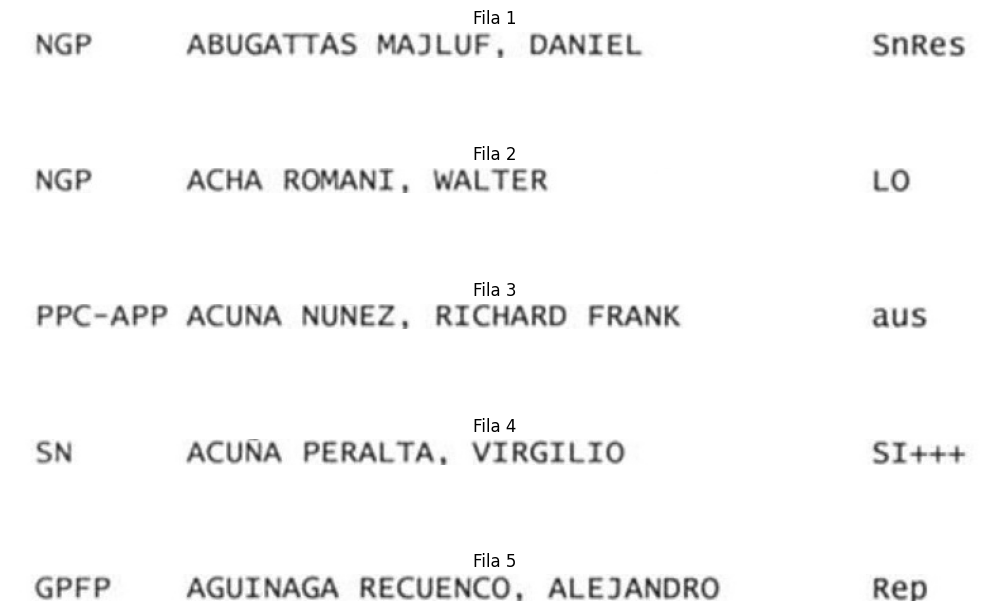


📝 Primeras 3 anotaciones en formato YOLO:
0 0.500000 0.023587 1.000000 0.009809
0 0.500000 0.045306 1.000000 0.009341
0 0.500000 0.067258 1.000000 0.009341


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Cargar la imagen
img_path = '/home/nahumfg/GithubProjects/parliament-voting-records/data/procesamiento_todas_votaciones/b_zonas/0a3e4a10-ae00-5869-bb60-769e30e79e4c_page003_/colyolo_columna_1_3.jpg'
imagen = cv2.imread(img_path)
imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

def detectar_filas_mejorado(imagen):
    """
    Detecta filas en una imagen de tabla usando procesamiento clásico
    """
    # Convertir a escala de grises
    gray = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Aplicar threshold para obtener imagen binaria
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    
    # Crear kernel horizontal largo para detectar líneas de texto
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (imagen.shape[1]//2, 1))
    
    # Detectar líneas horizontales
    horizontal_lines = cv2.morphologyEx(binary, cv2.MORPH_OPEN, horizontal_kernel, iterations=1)
    
    # Dilatar para conectar componentes cercanos
    kernel_dilate = cv2.getStructuringElement(cv2.MORPH_RECT, (imagen.shape[1]//4, 3))
    horizontal_lines = cv2.dilate(horizontal_lines, kernel_dilate, iterations=1)
    
    # Proyección horizontal para encontrar filas
    horizontal_projection = np.sum(binary, axis=1)
    
    # Encontrar picos en la proyección (inicio/fin de filas)
    threshold_projection = np.mean(horizontal_projection) * 0.3
    row_positions = []
    in_row = False
    start_y = 0
    
    for y in range(len(horizontal_projection)):
        if horizontal_projection[y] > threshold_projection:
            if not in_row:
                start_y = y
                in_row = True
        else:
            if in_row:
                if y - start_y > 10:  # Altura mínima de fila
                    row_positions.append((start_y, y))
                in_row = False
    
    # Si la última fila no se cerró
    if in_row and len(horizontal_projection) - start_y > 10:
        row_positions.append((start_y, len(horizontal_projection)))
    
    # Crear bounding boxes para cada fila
    filas = []
    margen = 2  # Margen adicional para capturar toda la fila
    
    for start_y, end_y in row_positions:
        # Expandir ligeramente los límites
        y1 = max(0, start_y - margen)
        y2 = min(imagen.shape[0], end_y + margen)
        altura = y2 - y1
        
        # Solo incluir si tiene altura razonable
        if 15 < altura < 100:  # Ajusta estos valores según tu imagen
            filas.append({
                'x': 0,
                'y': y1,
                'width': imagen.shape[1],
                'height': altura,
                'bbox': (0, y1, imagen.shape[1], altura)
            })
    
    return filas

# Detectar filas
filas_detectadas = detectar_filas_mejorado(imagen)

# Visualizar resultados
fig, axes = plt.subplots(2, 1, figsize=(12, 16))

# Imagen original
axes[0].imshow(imagen_rgb)
axes[0].set_title(f'Imagen Original - {len(filas_detectadas)} filas detectadas')
axes[0].axis('off')

# Imagen con filas detectadas
axes[1].imshow(imagen_rgb)
axes[1].set_title('Filas Detectadas')
axes[1].axis('off')

# Dibujar rectángulos para cada fila
colores = plt.cm.tab20(np.linspace(0, 1, len(filas_detectadas)))

for idx, fila in enumerate(filas_detectadas):
    rect = Rectangle(
        (fila['x'], fila['y']), 
        fila['width'], 
        fila['height'],
        linewidth=2, 
        edgecolor=colores[idx], 
        facecolor='none',
        alpha=0.7
    )
    axes[1].add_patch(rect)
    
    # Añadir número de fila
    axes[1].text(
        fila['x'] + 5, 
        fila['y'] + fila['height']/2, 
        f"Fila {idx+1}", 
        color='red', 
        fontsize=8, 
        fontweight='bold',
        bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5)
    )

plt.tight_layout()
plt.show()

# Imprimir información de las filas detectadas
print(f"\n✅ Total de filas detectadas: {len(filas_detectadas)}\n")
print("Coordenadas de cada fila:")
print("-" * 50)
for idx, fila in enumerate(filas_detectadas):
    print(f"Fila {idx+1:2d}: Y={fila['y']:3d} a Y={fila['y']+fila['height']:3d} (altura={fila['height']:2d}px)")

# Opcional: Extraer y mostrar cada fila individualmente
def mostrar_filas_individuales(imagen, filas, max_filas=5):
    """Muestra las primeras max_filas como imágenes separadas"""
    num_filas = min(len(filas), max_filas)
    
    if num_filas == 0:
        print("No hay filas para mostrar")
        return
    
    fig, axes = plt.subplots(num_filas, 1, figsize=(10, num_filas * 1.5))
    
    if num_filas == 1:
        axes = [axes]
    
    for idx in range(num_filas):
        fila = filas[idx]
        y1 = fila['y']
        y2 = fila['y'] + fila['height']
        
        # Extraer la región de la fila
        fila_img = imagen_rgb[y1:y2, :]
        
        axes[idx].imshow(fila_img)
        axes[idx].set_title(f'Fila {idx+1}')
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

# Mostrar las primeras 5 filas individualmente
print("\n📋 Primeras 5 filas extraídas:")
mostrar_filas_individuales(imagen, filas_detectadas, max_filas=5)

# Guardar las coordenadas para uso posterior (por ejemplo, para entrenar YOLO)
def exportar_coordenadas_yolo(filas, img_height, img_width, output_path=None):
    """
    Exporta las coordenadas en formato YOLO
    """
    yolo_annotations = []
    
    for fila in filas:
        # Convertir a formato YOLO (normalizado 0-1)
        x_center = (fila['x'] + fila['width']/2) / img_width
        y_center = (fila['y'] + fila['height']/2) / img_height
        width = fila['width'] / img_width
        height = fila['height'] / img_height
        
        # Clase 0 (solo tenemos una clase: "fila")
        yolo_annotations.append(f"0 {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
    
    if output_path:
        with open(output_path, 'w') as f:
            f.write('\n'.join(yolo_annotations))
        print(f"\n✅ Anotaciones YOLO guardadas en: {output_path}")
    
    return yolo_annotations

# Generar anotaciones en formato YOLO
anotaciones_yolo = exportar_coordenadas_yolo(
    filas_detectadas, 
    imagen.shape[0], 
    imagen.shape[1]
)

print("\n📝 Primeras 3 anotaciones en formato YOLO:")
for ann in anotaciones_yolo[:3]:
    print(ann)

🔍 DETECCIÓN DE COLUMNAS EN FILA
📁 Procesando: /mnt/user-data/uploads/1761794374447_image.png

❌ Error: No se pudo cargar la imagen

Procesando fila 1/1
🔍 DETECCIÓN DE COLUMNAS EN FILA
📁 Procesando: image.png

📐 Dimensiones: 922x64 px

⏳ Detectando columnas...
✅ 3 columnas detectadas

📊 Información de columnas:
   Columna 1: X=  16 a  394 (ancho=378 px)
   Columna 2: X= 414 a  666 (ancho=252 px)
   Columna 3: X= 852 a  913 (ancho= 61 px)


[ WARN:0@1335.607] global loadsave.cpp:275 findDecoder imread_('/mnt/user-data/uploads/1761794374447_image.png'): can't open/read file: check file path/integrity


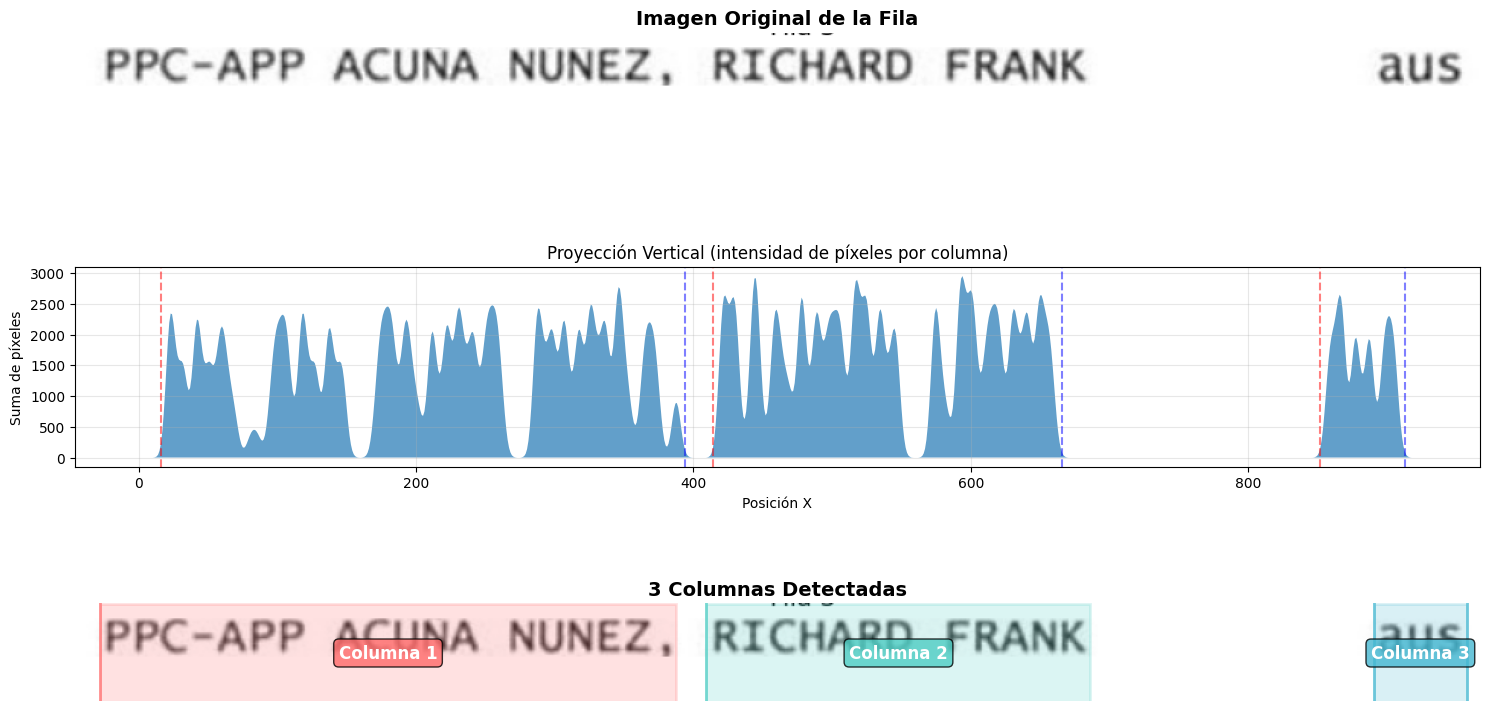

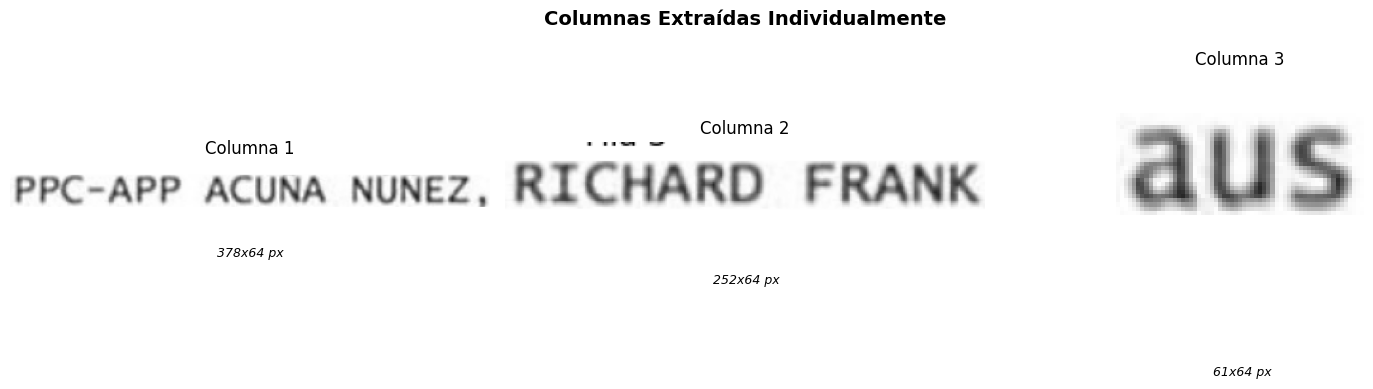

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def detectar_columnas_en_fila(imagen_fila):
    """
    Detecta las 3 columnas dentro de una imagen que contiene solo una fila
    """
    # Convertir a escala de grises
    if len(imagen_fila.shape) == 3:
        gray = cv2.cvtColor(imagen_fila, cv2.COLOR_BGR2GRAY)
    else:
        gray = imagen_fila
    
    # Binarizar
    _, binary = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)
    
    # Proyección vertical para encontrar espacios entre columnas
    vertical_projection = np.sum(binary, axis=0)
    
    # Suavizar la proyección para reducir ruido
    from scipy.ndimage import gaussian_filter1d
    vertical_projection_smooth = gaussian_filter1d(vertical_projection, sigma=3)
    
    # Encontrar valles (espacios entre columnas)
    threshold = np.mean(vertical_projection_smooth) * 0.1
    
    # Detectar inicio y fin de regiones con texto
    regiones = []
    en_texto = False
    x_inicio = 0
    
    for x in range(len(vertical_projection_smooth)):
        if vertical_projection_smooth[x] > threshold:
            if not en_texto:
                x_inicio = x
                en_texto = True
        else:
            if en_texto:
                if x - x_inicio > 20:  # Ancho mínimo de una columna
                    regiones.append((x_inicio, x))
                en_texto = False
    
    # Agregar última región si quedó abierta
    if en_texto and len(vertical_projection_smooth) - x_inicio > 20:
        regiones.append((x_inicio, len(vertical_projection_smooth)))
    
    # Si detectamos más de 3 regiones, combinar las más cercanas
    if len(regiones) > 3:
        regiones = combinar_regiones_cercanas(regiones, objetivo=3)
    
    # Si detectamos menos de 3, usar división fija
    if len(regiones) < 3:
        print(f"⚠️ Solo se detectaron {len(regiones)} regiones. Usando división fija en 3 partes.")
        ancho = imagen_fila.shape[1]
        regiones = [
            (0, ancho // 3),
            (ancho // 3, 2 * ancho // 3),
            (2 * ancho // 3, ancho)
        ]
    
    # Crear estructura de columnas
    columnas = []
    for idx, (x_start, x_end) in enumerate(regiones[:3]):  # Máximo 3 columnas
        columnas.append({
            'columna': idx + 1,
            'x_start': x_start,
            'x_end': x_end,
            'width': x_end - x_start,
            'y_start': 0,
            'y_end': imagen_fila.shape[0],
            'height': imagen_fila.shape[0]
        })
    
    return columnas, vertical_projection_smooth

def combinar_regiones_cercanas(regiones, objetivo=3):
    """
    Combina regiones muy cercanas hasta llegar al número objetivo
    """
    while len(regiones) > objetivo:
        # Encontrar el par de regiones más cercanas
        min_distancia = float('inf')
        merge_idx = 0
        
        for i in range(len(regiones) - 1):
            distancia = regiones[i+1][0] - regiones[i][1]
            if distancia < min_distancia:
                min_distancia = distancia
                merge_idx = i
        
        # Combinar las regiones más cercanas
        nueva_region = (regiones[merge_idx][0], regiones[merge_idx + 1][1])
        regiones = regiones[:merge_idx] + [nueva_region] + regiones[merge_idx + 2:]
    
    return regiones

def visualizar_columnas(imagen_fila, columnas, proyeccion=None):
    """
    Visualiza las columnas detectadas en la fila
    """
    if len(imagen_fila.shape) == 2:
        imagen_rgb = cv2.cvtColor(imagen_fila, cv2.COLOR_GRAY2RGB)
    else:
        imagen_rgb = cv2.cvtColor(imagen_fila, cv2.COLOR_BGR2RGB)
    
    # Crear figura con subplots
    if proyeccion is not None:
        fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 10), 
                                            gridspec_kw={'height_ratios': [2, 1, 2]})
    else:
        fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(15, 8))
    
    # 1. Imagen original
    ax1.imshow(imagen_rgb)
    ax1.set_title('Imagen Original de la Fila', fontsize=14, fontweight='bold')
    ax1.axis('off')
    
    # 2. Proyección vertical (si está disponible)
    if proyeccion is not None:
        ax2.fill_between(range(len(proyeccion)), proyeccion, alpha=0.7)
        ax2.set_title('Proyección Vertical (intensidad de píxeles por columna)', fontsize=12)
        ax2.set_xlabel('Posición X')
        ax2.set_ylabel('Suma de píxeles')
        ax2.grid(True, alpha=0.3)
        
        # Marcar las divisiones detectadas
        for col in columnas:
            ax2.axvline(x=col['x_start'], color='red', linestyle='--', alpha=0.5, label=f"Col {col['columna']} inicio")
            ax2.axvline(x=col['x_end'], color='blue', linestyle='--', alpha=0.5)
    
    # 3. Imagen con columnas detectadas
    ax3.imshow(imagen_rgb)
    ax3.set_title(f'{len(columnas)} Columnas Detectadas', fontsize=14, fontweight='bold')
    ax3.axis('off')
    
    # Colores para cada columna
    colores = ['#FF6B6B', '#4ECDC4', '#45B7D1']
    
    for idx, col in enumerate(columnas):
        # Dibujar rectángulo
        rect = Rectangle(
            (col['x_start'], 0),
            col['width'],
            imagen_fila.shape[0],
            linewidth=2,
            edgecolor=colores[idx],
            facecolor=colores[idx],
            alpha=0.2
        )
        ax3.add_patch(rect)
        
        # Líneas verticales de separación
        ax3.axvline(x=col['x_start'], color=colores[idx], linewidth=2, linestyle='-', alpha=0.7)
        if idx == len(columnas) - 1:
            ax3.axvline(x=col['x_end'], color=colores[idx], linewidth=2, linestyle='-', alpha=0.7)
        
        # Etiqueta
        x_center = (col['x_start'] + col['x_end']) / 2
        ax3.text(x_center, imagen_fila.shape[0] / 2, f'Columna {col["columna"]}',
                ha='center', va='center',
                fontsize=12, fontweight='bold',
                color='white',
                bbox=dict(boxstyle="round,pad=0.3", facecolor=colores[idx], alpha=0.8))
    
    plt.tight_layout()
    plt.show()

def extraer_columnas(imagen_fila, columnas):
    """
    Extrae cada columna como una imagen separada
    """
    columnas_extraidas = []
    
    for col in columnas:
        columna_img = imagen_fila[:, col['x_start']:col['x_end']]
        columnas_extraidas.append({
            'imagen': columna_img,
            'info': col
        })
    
    return columnas_extraidas

def mostrar_columnas_extraidas(columnas_extraidas):
    """
    Muestra las 3 columnas extraídas lado a lado
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    fig.suptitle('Columnas Extraídas Individualmente', fontsize=14, fontweight='bold')
    
    for idx, col_data in enumerate(columnas_extraidas):
        if len(col_data['imagen'].shape) == 2:
            axes[idx].imshow(col_data['imagen'], cmap='gray')
        else:
            imagen_rgb = cv2.cvtColor(col_data['imagen'], cv2.COLOR_BGR2RGB)
            axes[idx].imshow(imagen_rgb)
        
        axes[idx].set_title(f"Columna {idx + 1}", fontsize=12)
        axes[idx].axis('off')
        
        # Mostrar dimensiones
        h, w = col_data['imagen'].shape[:2]
        axes[idx].text(w/2, h + 10, f'{w}x{h} px', 
                      ha='center', fontsize=9, style='italic')
    
    plt.tight_layout()
    plt.show()

def procesar_fila_completa(imagen_path):
    """
    Función principal que procesa una imagen de fila completa
    """
    print("=" * 60)
    print("🔍 DETECCIÓN DE COLUMNAS EN FILA")
    print("=" * 60)
    print(f"📁 Procesando: {imagen_path}\n")
    
    # Cargar imagen
    imagen = cv2.imread(imagen_path)
    if imagen is None:
        print("❌ Error: No se pudo cargar la imagen")
        return None
    
    print(f"📐 Dimensiones: {imagen.shape[1]}x{imagen.shape[0]} px\n")
    
    # Detectar columnas
    print("⏳ Detectando columnas...")
    columnas, proyeccion = detectar_columnas_en_fila(imagen)
    print(f"✅ {len(columnas)} columnas detectadas\n")
    
    # Mostrar información de cada columna
    print("📊 Información de columnas:")
    for col in columnas:
        print(f"   Columna {col['columna']}: X={col['x_start']:4d} a {col['x_end']:4d} (ancho={col['width']:3d} px)")
    
    # Visualizar
    visualizar_columnas(imagen, columnas, proyeccion)
    
    # Extraer columnas
    columnas_extraidas = extraer_columnas(imagen, columnas)
    mostrar_columnas_extraidas(columnas_extraidas)
    
    return columnas, columnas_extraidas

# ============================================
# EJEMPLO DE USO ESPECÍFICO
# ============================================

# Para tu imagen específica
imagen_path = "/mnt/user-data/uploads/1761794374447_image.png"  # Usando la imagen que subiste

# Procesar la fila
resultado = procesar_fila_completa(imagen_path)

if resultado:
    columnas, columnas_extraidas = resultado
    
    print("\n" + "=" * 60)
    print("✅ PROCESAMIENTO COMPLETADO")
    print("=" * 60)
    
    # Opcional: Guardar cada columna como imagen separada
    guardar_columnas = False  # Cambiar a True si quieres guardar
    
    if guardar_columnas:
        for idx, col_data in enumerate(columnas_extraidas):
            output_path = f"columna_{idx+1}.png"
            cv2.imwrite(output_path, col_data['imagen'])
            print(f"💾 Columna {idx+1} guardada en: {output_path}")

# Función adicional para procesar múltiples filas
def procesar_multiples_filas(lista_imagenes_filas):
    """
    Procesa una lista de imágenes de filas
    """
    resultados = []
    
    for idx, imagen_path in enumerate(lista_imagenes_filas):
        print(f"\n{'='*60}")
        print(f"Procesando fila {idx+1}/{len(lista_imagenes_filas)}")
        print(f"{'='*60}")
        
        resultado = procesar_fila_completa(imagen_path)
        if resultado:
            resultados.append({
                'fila': idx + 1,
                'path': imagen_path,
                'columnas': resultado[0],
                'extraidas': resultado[1]
            })
    
    return resultados

# Ejemplo de uso para múltiples filas (descomenta si tienes varias)
rutas_filas = [
     "image.png"
 ]
resultados = procesar_multiples_filas(rutas_filas)